**Sigmoid activation:**
    $$
    \begin{align}
    g(z) &= \frac{1}{1 + e^{-z}}\\
    p(y_j=1 | \mathrm{x_j}; \mathrm{w}) &= g(\mathrm{w}^T\mathrm{x_j})\\
    p(y_j=0 | \mathrm{x_j}; \mathrm{w}) &= 1 - g(\mathrm{w}^T\mathrm{x_j})
    \end{align}
    $$

**Cost function:** 
    $$
    \begin{align}
    l((X,Y);\mathrm{w}) &= -\frac{1}{n}\sum_{j=1}^{j=n} log~p(y_j | \mathrm{x_j}; \mathrm{w})\\
    \end{align}
    $$

**g'(z) = g(z)(1-g(z)):**
    $$
    \begin{align}
    g(z) &= \frac{1}{1 + e^{-z}}\\
    g'(z) &= \frac{e^{-z}}{1 + e^{-z}}\\
    g(z)(1-g(z)) &= \frac{1}{{1+e^{-z}}} \cdot \left(1 - \frac{1}{{1+e^{-z}}}\right) = \frac{1}{{1+e^{-z}}} \cdot \left( \frac{1+e^{-z}-1}{{1+e^{-z}}}\right) = \frac{e^{-z}}{1 + e^{-z}}\\
    g'(z) &= g(z)(1-g(z))
    \end{align}
    $$

**Gradient calculation:**
$$
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} (y_t - g(w {x}_t)) \cdot \stackrel{\rightarrow}{x}_t\\
p(y|x) = g(wx)^y \cdot (1 - g(wx))^{(1-y)}\\
l(w) = \frac{1}{N} \sum_{t=1}^{N} \log(g(wx)^y \cdot (1 - g(wx))^{(1-y)})\\
l(w) = \frac{1}{N} \sum_{t=1}^{N} y_t \log(g(wx)) + (1 - y_t) \log(1 - g(wx))\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} \left( y_t \frac{g'(wx)}{g(wx)}x_t - (1 - y_t) \frac{g'(wx)}{1 - g(wx)}x_t \right)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} \left( y_t \frac{g(wx_t)(1 - g(wx_t))}{g(wx_t)}x_t - (1 - y_t) \frac{g(wx_t)(1 - g(wx_t))}{1 - g(wx_t)}x_t \right)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} x_t y_t (1 - g(w x_t)) - (1 - y_t) x_t g(w x_t)\\
\frac{\partial l(w)}{\partial w} = \frac{1}{N} \sum_{t=1}^{N} (y_t - g(w {x}_t)) \cdot \stackrel{\rightarrow}{x}_t\\
$$

## Import libraries and files

In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST .mat file
mnist_data = scipy.io.loadmat('mnist_all.mat')

## Visualize some of the feature vectors

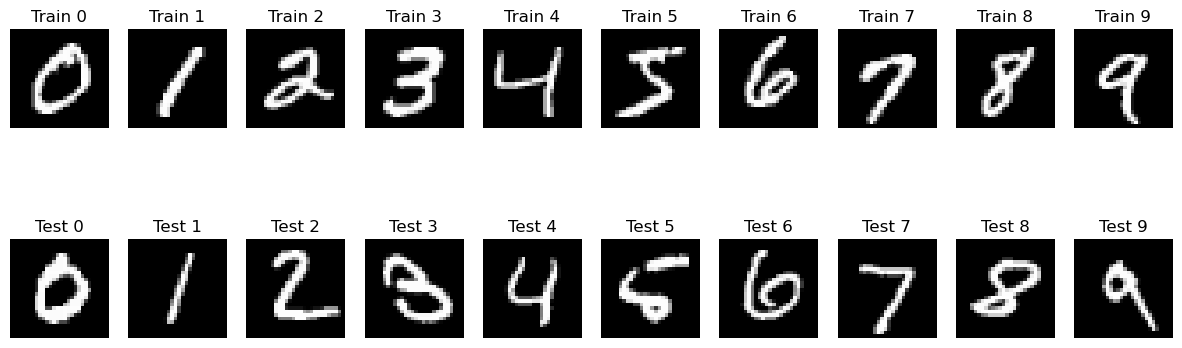

In [14]:
# mnist_data is loaded and contains 'train0', 'train1', ..., 'test0', 'test1', ...

# Create arrays to store reshaped images for train and test sets
some_train_mat = np.zeros((10, 28, 28))
some_test_mat = np.zeros((10, 28, 28))

# Loop through each digit (0 to 9)
for digit in range(10):
    # Access the 'train' and 'test' matrices for the current digit
    train_digit_matrix = mnist_data['train' + str(digit)]
    test_digit_matrix = mnist_data['test' + str(digit)]
    
    # Reshape the first row of the 'train' and 'test' matrices into 28x28 images
    train_Pic_i_sample = np.reshape(train_digit_matrix[0, :], (28, 28))
    test_Pic_i_sample = np.reshape(test_digit_matrix[0, :], (28, 28))
    
    # Store the reshaped images in the respective arrays
    some_train_mat[digit] = train_Pic_i_sample
    some_test_mat[digit] = test_Pic_i_sample


# Display the images from the training set
plt.figure(figsize=(15, 5))
for digit in range(10):
    plt.subplot(2, 10, digit + 1)
    plt.imshow(some_train_mat[digit], cmap='gray')
    plt.title(f'Train {digit}')
    plt.axis('off')

# Display the images from the test set

    plt.subplot(2, 10, digit + 11)
    plt.imshow(some_test_mat[digit], cmap='gray')
    plt.title(f'Test {digit}')
    plt.axis('off')

plt.show()
